In [1]:
import scipy, patsy
from gpmultipy import dataset
import pandas as pd

In [2]:
%pylab

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [3]:
%matplotlib inline

In [109]:
ds1 = dataset.DataSet("../data/normalized/ura3-pq-replicate/")
ds1.meta['batch'] = 1

ds2 = dataset.DataSet("../data/pq-osmo-control/")
ds2.meta['mM_PQ'] = ds2.meta['mM PQ']
ds2.meta.mM_PQ[ds2.meta.mM_PQ.isnull()] = 0
ds2.meta['batch'] = 2

ds3 = dataset.DataSet("../data/pq-osmo-combo/")
ds3.meta['mM_PQ'] = ds3.meta['mM PQ']
ds3.meta.mM_PQ[ds3.meta.mM_PQ.isnull()] = 0
ds3.meta['batch'] = 3

/home/ptonner/dev/experimental-variation/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ptonner/dev/experimental-variation/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [110]:
meta = pd.concat((ds1.meta,ds2.meta,ds3.meta))
meta.loc[meta['M NaCl'].isnull(),'M NaCl'] = 4.2

meta.head()

,Bio,Condition,M NaCl,Media,Strain,Tech,Well,batch,mM PQ,mM_PQ
0,NaN,NaN,4.2,CM,blank,NaN,101,1,NaN,0.0000
1,A,NaN,4.2,CM,ura3,1.0,102,1,NaN,0.0000
2,A,NaN,4.2,CM,ura3,2.0,103,1,NaN,0.0000
3,A,NaN,4.2,CM,ura3,3.0,104,1,NaN,0.0000
4,A,0.0415mM PQ,4.2,CM,ura3,1.0,105,1,0.0415,0.0415


In [111]:
data = pd.concat((ds1.data,ds2.data,ds3.data),1)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Time,,,,,,,,,,,,,,,,,,,,,
0.0,0.095,0.102,0.099,0.098,0.091,0.102,0.109,0.096,0.111,0.092,...,0.164,0.139,0.134,0.134,0.130,0.127,0.125,0.122,0.116,0.100
0.5,0.096,0.104,0.101,0.100,0.093,0.104,0.112,0.095,0.110,0.089,...,0.149,0.148,0.141,0.139,0.138,0.132,0.132,0.127,0.121,0.100
1.0,0.097,0.104,0.103,0.101,0.093,0.105,0.114,0.096,0.110,0.089,...,0.141,0.148,0.146,0.141,0.141,0.136,0.134,0.129,0.122,0.101
1.5,0.098,0.106,0.106,0.102,0.095,0.107,0.116,0.097,0.112,0.090,...,0.146,0.153,0.151,0.144,0.144,0.140,0.135,0.129,0.124,0.101
2.0,0.099,0.108,0.107,0.103,0.096,0.108,0.117,0.097,0.113,0.090,...,0.149,0.157,0.156,0.149,0.149,0.145,0.139,0.132,0.126,0.102


In [112]:
# remove osmo stress

select = meta['M NaCl']==4.2
meta = meta[select]
data = data.loc[:,select]

In [113]:
# remove edges

edge = range(101,111) + range(111,191,10) + range(120,191,10) + range(191,201) + range(201,211) + range(211,291,10) + range(220,291,10) + range(291,301)
edge = np.array(edge)

select = ~meta.Well.isin(edge)

meta = meta[select]
data = data.loc[:,select]

In [114]:
data.to_csv("data/data.csv")
meta.to_csv("data/meta.csv",index=False)

In [115]:
ds = dataset.DataSet('data/')

In [116]:
pivot = pd.concat((ds.meta, ds.data.T),1,ignore_index=False)
pivot.head()

,Bio,Condition,M NaCl,Media,Strain,Tech,Well,batch,mM PQ,mM_PQ,...,67.5,68.0,68.5,69.0,69.5,70.0,70.5,71.0,71.5,72.0
0,A,0.167mM PQ,4.2,CM,ura3,1.0,112,1,0.167,0.167,...,0.466,0.463,0.448,0.464,0.447,0.452,0.449,0.436,0.436,0.425
1,A,0.167mM PQ,4.2,CM,ura3,2.0,113,1,0.167,0.167,...,0.488,0.492,0.481,0.475,0.479,0.482,0.467,0.474,0.471,0.460
2,A,0.167mM PQ,4.2,CM,ura3,3.0,114,1,0.167,0.167,...,0.499,0.507,0.489,0.488,0.489,0.500,0.485,0.487,0.489,0.473
3,A,0.333mM PQ,4.2,CM,ura3,1.0,115,1,0.333,0.333,...,0.168,0.168,0.166,0.168,0.166,0.167,0.163,0.164,0.165,0.163
4,A,0.333mM PQ,4.2,CM,ura3,2.0,116,1,0.333,0.333,...,0.348,0.345,0.340,0.349,0.343,0.348,0.349,0.338,0.341,0.337


In [123]:
melt = pd.melt(pivot, ds.meta.columns.tolist(), ds.data.columns.tolist(), var_name='time', value_name='od')
melt.head()

,Bio,Condition,M NaCl,Media,Strain,Tech,Well,batch,mM PQ,mM_PQ,time,od
0,A,0.167mM PQ,4.2,CM,ura3,1.0,112,1,0.167,0.167,0,0.103
1,A,0.167mM PQ,4.2,CM,ura3,2.0,113,1,0.167,0.167,0,0.108
2,A,0.167mM PQ,4.2,CM,ura3,3.0,114,1,0.167,0.167,0,0.116
3,A,0.333mM PQ,4.2,CM,ura3,1.0,115,1,0.333,0.333,0,0.091
4,A,0.333mM PQ,4.2,CM,ura3,2.0,116,1,0.333,0.333,0,0.103


In [124]:
melt.time = melt.time.astype(float)
melt.mM_PQ = melt.mM_PQ.round(2)

melt = melt[~melt.od.isnull()]
melt = melt[melt.Strain=='ura3']
melt = melt[~(melt.Bio.isin(list('EFGHIJKLMN')))]

melt.Bio = melt.Bio.astype('category').cat.codes
melt.Bio += 1

melt.od = np.log2(melt.od)

melt.shape

(10950, 12)

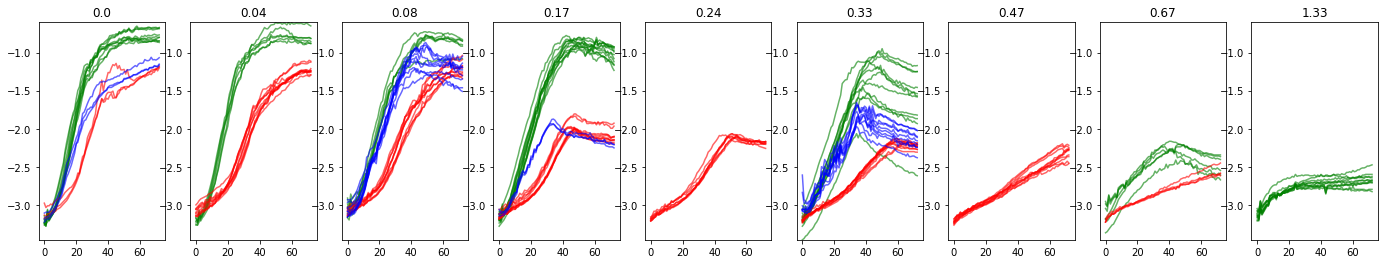

In [125]:
g = melt.groupby(['mM_PQ','batch','Bio','Well'])
pqvals = melt.mM_PQ.unique()
pqvals.sort()

plt.figure(figsize=(24,4))

for k, temp in g:
    #print k
    pq, batch, bio, well = k
    
    ind = pqvals.tolist().index(pq)
    plt.subplot(1,pqvals.shape[0],ind+1)
    plt.title(pq)
    
    temp = temp.sort_values('time')
    
    if batch == 1:
        color = 'g'
    elif batch == 2:
        color = 'r'
    else:
        color = 'b'
    
    plt.plot(temp.time,temp.od,c=color,alpha=.6)
    plt.ylim(melt.od.min(), melt.od.max())

In [216]:
ygp, xgp = patsy.dmatrices('standardize(od) ~ standardize(time) + standardize(mM_PQ) + batch + Bio + 0', melt)
xgp

DesignMatrix with shape (20148, 4)
  standardize(time)  standardize(mM_PQ)  batch  Bio
           -1.70848            -0.66651      1    1
           -1.70848            -0.66651      1    1
           -1.70848            -0.66651      1    1
           -1.70848            -0.55843      1    1
           -1.70848            -0.55843      1    1
           -1.70848            -0.55843      1    1
           -1.70848            -0.45292      1    1
           -1.70848            -0.45292      1    1
           -1.70848            -0.45292      1    1
           -1.70848            -0.23675      1    1
           -1.70848            -0.23675      1    1
           -1.70848            -0.23675      1    1
           -1.70848             0.19043      1    1
           -1.70848             0.19043      1    1
           -1.70848             0.19043      1    1
           -1.70848             1.04994      1    1
           -1.70848             1.04994      1    1
           -1.70848          

In [217]:
np.unique(xgp[:,-1])

array([ 1.,  2.,  3.,  4.])

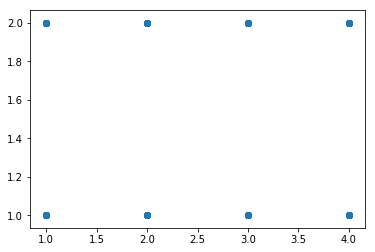

In [218]:
plt.scatter(xgp[:,-1],xgp[:,-2])

In [224]:
xgp = pd.DataFrame(xgp, columns = xgp.design_info.column_names)

,standardize(time),standardize(mM_PQ),batch,Bio
0,-1.708484,-0.666508,1.0,1.0
1,-1.708484,-0.666508,1.0,1.0
2,-1.708484,-0.666508,1.0,1.0
3,-1.708484,-0.558426,1.0,1.0
4,-1.708484,-0.558426,1.0,1.0
5,-1.708484,-0.558426,1.0,1.0
6,-1.708484,-0.452917,1.0,1.0
7,-1.708484,-0.452917,1.0,1.0
8,-1.708484,-0.452917,1.0,1.0
9,-1.708484,-0.236752,1.0,1.0


In [211]:
# g = melt.groupby(['mM_PQ','batch','Bio'])
# pqvals = melt.mM_PQ.unique(); pqvals.sort()

In [212]:
# for k, in g:
#     print i,k

In [ ]:
g = 

In [65]:


# x,y,effect,labels = ds.build(Strain='ura3',scale='range',effects=['Well','Bio','mM_PQ'])
x,y,effect,labels = ds.build(Strain='ura3',scale='range',Bio=['B','C','D'],effects=['Well','batch','Bio','mM_PQ'])

# remove early time points
x = x[6:,:]
y = y[6:,:]

# observations that are on an edge are removed
edge = range(101,111) + range(111,191,10) + range(120,191,10) + range(191,201) + range(201,211) + range(211,291,10) + range(220,291,10) + range(291,301)
edge = np.array(edge)

dist = np.array([min(abs(l-edge)) for l in labels[0]])
position = (dist==0).astype(int)

select = dist > 0

In [68]:
effect

,Well,batch,Bio,mM_PQ
23,0,0,0,0
24,1,0,0,0
25,2,0,0,0
26,3,0,0,1
27,4,0,0,1
28,5,0,0,1
29,6,0,0,2
30,7,0,0,2
31,8,0,0,2
32,9,0,0,3


In [ ]:
y = y[:,select]
effect = effect.iloc[select,:]

# standardize
y = np.log2(y)

# scale to 0 within bio reps
# for i,p in enumerate(effect.Bio.unique()):
#     select = effect.Bio==p
#     y[:,select] -= y[0,select].mean()

y = (y-y.mean())/y.std()

y.shape

In [53]:
labels[2]

[0.0,
 0.041500000000000002,
 0.083000000000000004,
 0.16699999999999998,
 0.33299999999999996,
 0.66700000000000004,
 1.3330000000000002]

In [54]:
# reindex so groups are useful
effect.index = range(effect.shape[0])

gall = effect.groupby(['mM_PQ','Bio'])
gpq = effect.groupby(['mM_PQ'])

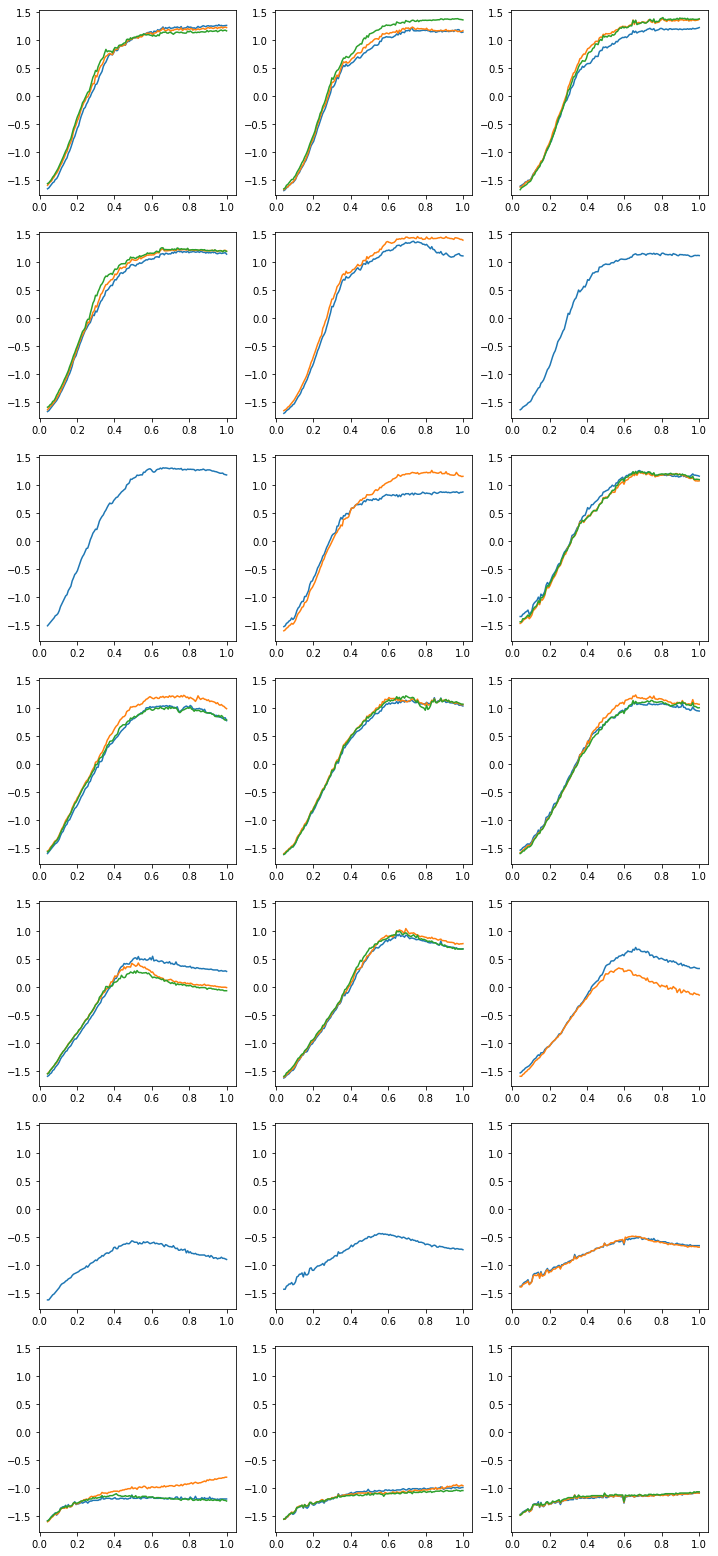

In [55]:
plt.figure(figsize=(len(labels[1])*4, len(labels[2])*4))

for k,v in gall:
    #print k,v.index
    
    pq,bio = k
    
    plt.subplot(len(labels[2]), len(labels[1]), pq*len(labels[1]) + bio + 1)
    
    plt.plot(x[:,0], y[:,v.index])
    plt.ylim(y.min()*1.05,y.max()*1.05)

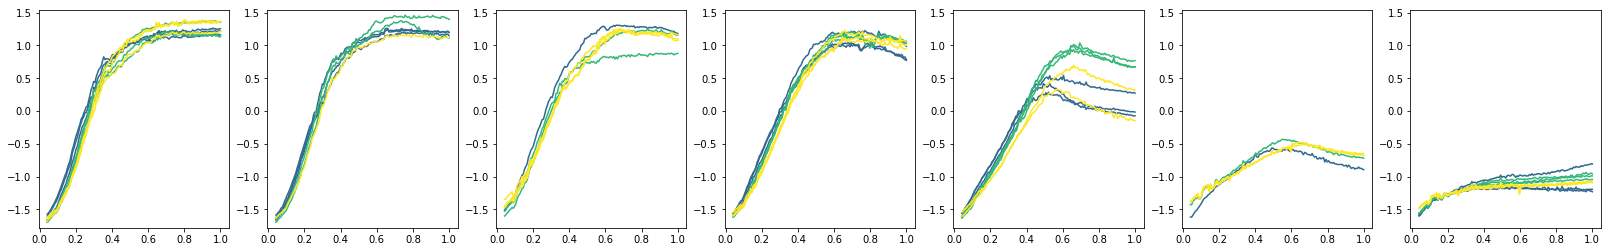

In [56]:
plt.figure(figsize=(len(labels[2])*4,4))
cmap = plt.get_cmap()

for k,v in gall:
    
    pq,bio = k
    
    plt.subplot(1, len(labels[2]), pq + 1)
    
    plt.plot(x[:,0], y[:,v.index], color = cmap((bio+1)*1./3))
    plt.ylim(y.min()*1.05,y.max()*1.05)

In [61]:
ds = dataset.DataSet('data/')

# x,y,effect,labels = ds.build(Strain='ura3',scale='range',effects=['Well','Bio','mM_PQ'])
x,y,effect,labels = ds.build(Strain='ura3',scale='range',batch=2,effects=['Well','Bio','mM_PQ'])

# remove early time points
x = x[6:,:]
y = y[6:,:]

# observations that are on an edge are removed
edge = range(101,111) + range(111,191,10) + range(120,191,10) + range(191,201) + range(201,211) + range(211,291,10) + range(220,291,10) + range(291,301)
edge = np.array(edge)

dist = np.array([min(abs(l-edge)) for l in labels[0]])
position = (dist==0).astype(int)

select = dist > 0
y = y[:,select]
effect = effect.iloc[select,:]

# standardize
y = np.log2(y)

# scale to 0 within bio reps
# for i,p in enumerate(effect.Bio.unique()):
#     select = effect.Bio==p
#     y[:,select] -= y[0,select].mean()

y = (y-y.mean())/y.std()

y.shape

(139, 123)

In [62]:
# reindex so groups are useful
effect.index = range(effect.shape[0])

gall = effect.groupby(['mM_PQ','Bio'])
gpq = effect.groupby(['mM_PQ'])

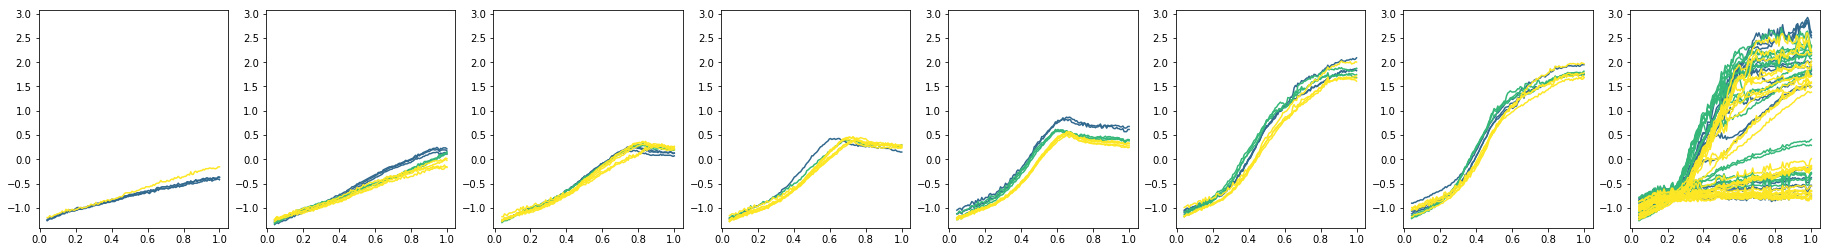

In [63]:
plt.figure(figsize=(len(labels[2])*4,4))
cmap = plt.get_cmap()

for k,v in gall:
    
    pq,bio = k
    
    plt.subplot(1, len(labels[2]), pq + 1)
    
    plt.plot(x[:,0], y[:,v.index], color = cmap((bio+1)*1./3))
    plt.ylim(y.min()*1.05,y.max()*1.05)